In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

In [17]:
df = pd.read_csv('Data/usa_00003.csv')

In [18]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'CPI99',
       'STATEICP', 'COUNTYICP', 'PUMA', 'STRATA', 'GQ', 'PERNUM', 'PERWT',
       'SEX', 'AGE', 'RACE', 'RACED', 'HISPAN', 'HISPAND', 'CITIZEN',
       'YRSUSA2', 'HINSEMP', 'HINSPUR', 'HINSCAID', 'EMPSTAT', 'EMPSTATD',
       'INCTOT', 'POVERTY'],
      dtype='object')

In [4]:
df.describe

<bound method NDFrame.describe of         YEAR  SAMPLE  SERIAL       CBSERIAL   HHWT        CLUSTER  STATEICP  \
0       2009  200901  816419             89  150.0  2009008164191        13   
1       2009  200901  816422            147  213.0  2009008164221        13   
2       2009  200901  816422            147  213.0  2009008164221        13   
3       2009  200901  816422            147  213.0  2009008164221        13   
4       2009  200901  816422            147  213.0  2009008164221        13   
...      ...     ...     ...            ...    ...            ...       ...   
237142  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237143  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237144  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237145  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237146  2019  201901  923331  2019001412438   94.0  2019009233311        13   

        COUNTYICP

In [19]:
df["INCTOT"].replace({9999999: np.nan}, inplace=True) #removing coded variable for no income information
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,PUMA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,200901,816419,89,150.0,2009008164191,0.777,13,810,4101,...,0,2,5,2,1,2,1,10,3800.0,33
1,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,1,10,15000.0,93
2,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,3,30,0.0,93
3,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,0,0,0.0,93
4,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,0,0,NaN,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237142,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,0,1,1,2,3,30,0.0,53
237143,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,0,1,1,2,0,0,NaN,53
237144,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,0,1,1,2,0,0,NaN,53
237145,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,0,1,1,2,0,0,NaN,53


In [20]:
df1 = df[df['INCTOT'].notna()]
df1

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,PUMA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,200901,816419,89,150.0,2009008164191,0.777,13,810,4101,...,0,2,5,2,1,2,1,10,3800.0,33
1,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,1,10,15000.0,93
2,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,3,30,0.0,93
3,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,0,3,2,1,1,2,0,0,0.0,93
5,2009,200901,816465,717,85.0,2009008164651,0.777,13,810,4103,...,0,3,3,1,1,2,3,30,0.0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237138,2019,201901,923317,2019001412249,56.0,2019009233171,0.652,13,610,3803,...,200,0,5,1,1,2,3,30,13300.0,101
237140,2019,201901,923323,2019001412338,161.0,2019009233231,0.652,13,470,4010,...,0,2,5,1,1,2,3,30,8800.0,72
237141,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,0,1,1,2,3,30,16200.0,53
237142,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,0,1,1,2,3,30,0.0,53


Note: You might have to restart the kernel in order for this code to work

In [21]:
df1['ADJINC'] = df1['INCTOT']*df1['CPI99']

<ipython-input-21-d7bcb78dde73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ADJINC'] = df1['INCTOT']*df1['CPI99']


# Weighting Survey Variables/Data Cleaning

In [23]:
# https://github.com/jsvine/weightedcalcs

calc = wc.Calculator("PERWT") # code to help create the weighted variables

## Creating a weight for Average Income using the person weight from the survey

In [24]:
avg_inc = calc.mean(df1, 'ADJINC') #calculation for the average income of the entire dataset
avg_inc

9183.462070079433

Tabulating Average Income by Year

In [25]:
year = df1.groupby(['YEAR'], as_index=False)

In [26]:
Year = calc.mean(year, 'ADJINC').reset_index()
year1 = Year.rename(columns={None: 'AVGINC'})
year1

,index,YEAR,AVGINC
0,0,2009,8474.256697
1,1,2010,8632.415800
2,2,2011,8292.050193
3,3,2012,7976.377545
4,4,2013,8746.009198
5,5,2014,8518.819994
6,6,2015,9035.902525
7,7,2016,9645.961314
8,8,2017,9962.134751
9,9,2018,10078.010133


Tabulating Average Income by Year and Borough (County)

In [27]:
year_borough = df1.groupby(['YEAR', 'COUNTYICP'], as_index=False)


In [28]:
yr_br = calc.mean(year_borough, 'ADJINC').reset_index()
yr_br.head()

,index,YEAR,COUNTYICP,NaN
0,0,2009,50,6871.155833
1,1,2009,470,8323.435664
2,2,2009,610,9926.949865
3,3,2009,810,9061.651438
4,4,2009,850,9952.110834


In [29]:
yr_br.columns

Index(['index', 'YEAR', 'COUNTYICP', None], dtype='object')

In [30]:
yr_br1 = yr_br.rename(columns={None: 'AVGINC'})
yr_br1

,index,YEAR,COUNTYICP,AVGINC
0,0,2009,50,6871.155833
1,1,2009,470,8323.435664
2,2,2009,610,9926.949865
3,3,2009,810,9061.651438
4,4,2009,850,9952.110834
5,5,2010,50,7425.924789
6,6,2010,470,8365.648298
7,7,2010,610,9117.961620
8,8,2010,810,9804.028569
9,9,2010,850,9193.529718


Tabulating Average Income by Year and Borough (County) and PUMA (Public Use MicroData Areas)

In [31]:
puma = df1.groupby(['YEAR', 'COUNTYICP', 'PUMA'], as_index=False)

In [32]:
PUMA = calc.mean(puma, 'ADJINC').reset_index()
neighborhood = PUMA.rename(columns={None: 'AVGINC'})
neighborhood

,index,YEAR,COUNTYICP,PUMA,AVGINC
0,0,2009,50,3701,6500.892486
1,1,2009,50,3702,7248.356306
2,2,2009,50,3703,7497.819665
3,3,2009,50,3704,9175.762454
4,4,2009,50,3705,6375.228002
...,...,...,...,...,...
600,600,2019,810,4113,12475.184033
601,601,2019,810,4114,9253.712147
602,602,2019,850,3901,12711.289790
603,603,2019,850,3902,11763.709066


## Creating a Distribution for Weighted Employment

In [6]:
emp_weight = calc.distribution(df1, 'EMPSTAT')
emp_weight

EMPSTAT
0    0.025191
1    0.330450
2    0.081345
3    0.563014
Name: PERWT, dtype: float64

In [7]:
df2 = df1.copy()

In [9]:
mask = df2['EMPSTAT'] == 0

df2.loc[mask, 'EMPWT'] = 0.025191

mask1 = df2['EMPSTAT'] == 1
df2.loc[mask1, 'EMPWT'] = 0.330450

mask2 = df2['EMPSTAT'] == 2
df2.loc[mask2, 'EMPWT'] = 0.081345

mask3 = df2['EMPSTAT'] == 3
df2.loc[mask3, 'EMPWT'] = 0.563014

df2

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY,EMPWT
0,2009,200901,816419,89,150.0,2009008164191,13,810,4101,410136,...,2,5,2,1,2,1,10,3800.0,33,0.330450
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,3,2,1,1,2,1,10,15000.0,93,0.330450
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,3,2,1,1,2,3,30,0.0,93,0.563014
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,3,2,1,1,2,0,0,0.0,93,0.025191
5,2009,200901,816465,717,85.0,2009008164651,13,810,4103,410336,...,3,3,1,1,2,3,30,0.0,114,0.563014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237138,2019,201901,923317,2019001412249,56.0,2019009233171,13,610,3803,380336,...,0,5,1,1,2,3,30,13300.0,101,0.563014
237140,2019,201901,923323,2019001412338,161.0,2019009233231,13,470,4010,401036,...,2,5,1,1,2,3,30,8800.0,72,0.563014
237141,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,1,1,2,3,30,16200.0,53,0.563014
237142,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,1,1,2,3,30,0.0,53,0.563014


## Creating a Distribution for Weighted Sex Variable

In [12]:
sex_weight = calc.distribution(df1, 'SEX')
sex_weight

SEX
1    0.421731
2    0.578269
Name: PERWT, dtype: float64

In [13]:
age_weight = calc.distribution(df, 'AGE')
age_weight

AGE
0     0.020403
1     0.021644
2     0.021658
3     0.022174
4     0.022385
        ...   
89    0.002146
90    0.002036
91    0.001060
94    0.003291
95    0.003976
Name: PERWT, Length: 94, dtype: float64

In [14]:
cit_weight = calc.distribution(df1, 'CITIZEN')
cit_weight

CITIZEN
0    0.503535
1    0.011790
2    0.261256
3    0.223420
Name: PERWT, dtype: float64

In [15]:
df1['PERWT'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         149.0
1         212.0
2         185.0
3         200.0
5          50.0
          ...  
237138     56.0
237140    161.0
237141     72.0
237142     62.0
237146    145.0
Name: PERWT, Length: 173724, dtype: float64>

## Weighting the Medicaid Total Survey Population 

In [43]:
yr_weighted = df.groupby('YEAR').sum('PERWT') # Weighted variables grouped only by year

In [14]:
df_weighted = df.groupby(['YEAR', 'COUNTYICP'], as_index=False).sum('PERWT') # Weighted variables grouped by year and county

In [15]:
df_weighted

,YEAR,COUNTYICP,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,50,805613010,3446107288,2785106034,520870.0,8056124461076890,52130,14862963,1486440660,...,768973,2655,5096,4220,4224,8020,6112,61212,23894224.0,466542
1,2009,470,1318714164,5641464027,4567508128,774537.0,13187132414646788,85332,26318975,2632133804,...,424998,5587,8852,7037,7027,13128,10265,102784,48521686.0,942328
2,2009,610,441781299,1889913574,1529582282,259874.0,4417809899137939,28587,8365942,836673364,...,387974,1822,3575,2361,2351,4398,4199,42018,21651904.0,292355
3,2009,810,819475179,3508695670,2886624209,508597.0,8194746086960779,53027,16753675,1675514344,...,467266,4558,6623,4338,4318,8158,6398,64058,33779108.0,750665
4,2009,850,136612680,586726931,510444347,95046.0,1366125867269990,8840,2653556,265380080,...,40924,347,593,770,714,1360,1128,11288,5820854.0,117538
5,2010,50,898876472,3882718547,3183119694,577706.0,8988758827189942,58136,16574938,1657654792,...,875818,3106,5558,4733,4751,8944,6693,67016,29191283.0,540301
6,2010,470,1451227220,6261246035,5019869525,843034.0,14512262612467572,93860,28950432,2895303120,...,476500,6345,9843,7620,7564,14440,11227,112408,54499360.0,1052039
7,2010,610,493055453,2131032089,1766339712,307481.0,4930551310323343,31889,9332164,933304708,...,416164,1984,3664,2683,2636,4906,4591,45962,25567164.0,348101
8,2010,810,977467863,4224053609,3491501274,582341.0,9774672240540964,63219,19975026,1997677668,...,526410,5552,7672,5242,5160,9726,7422,74338,42574509.0,874924
9,2010,850,133866666,577375959,460065629,79482.0,1338665773760256,8658,2598896,259913576,...,44142,395,714,755,692,1332,1151,11514,6077120.0,121937


Weighted Medicaid Population in NYC 2009-2019

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Medicaid Recipients'),
 Text(0.5, 1.0, 'Medicaid Recipients in NYC 2009-2019')]

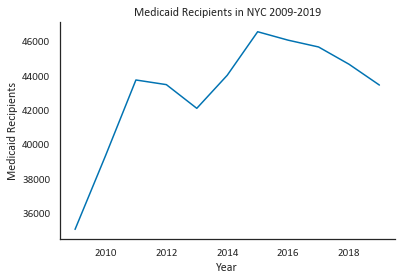

In [47]:
n = sns.lineplot(x='YEAR', y='HINSCAID', data=yr_weighted)
sns.despine()
n.set(xlabel='Year', ylabel='Medicaid Recipients', title='Medicaid Recipients in NYC 2009-2019')

# Plotting Average Income

Across NYC

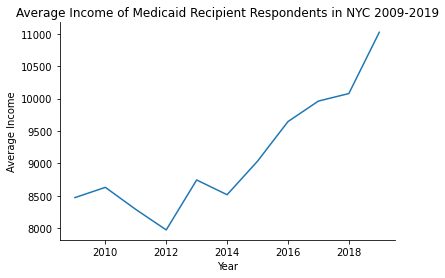

In [33]:
i = sns.lineplot(x='YEAR', y='AVGINC', data=year1)
i.ticklabel_format(style='plain', axis='both')
sns.despine()
plt.ylabel('Average Income')
plt.xlabel('Year')
plt.title('Average Income of Medicaid Recipient Respondents in NYC 2009-2019')
plt.savefig('NYC Medicaid Population Average Income 2009-2019.png')

By County/Borough

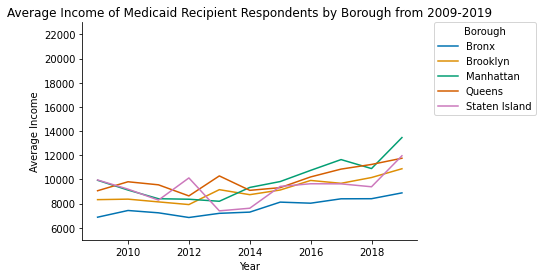

In [37]:
yr_br1 = yr_br1.replace([50, 470, 610, 810, 850], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
sns.lineplot(x='YEAR', y='AVGINC', hue='COUNTYICP', 
             data=yr_br1,  palette=sns.color_palette("colorblind", n_colors=5))
sns.despine()
plt.ylabel('Average Income')
plt.xlabel('Year')
plt.ylim(5000, 23000)
plt.title('Average Income of Medicaid Recipient Respondents by Borough from 2009-2019')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Borough")
plt.savefig('Medicaid Population Average Income by Borough 2009-2019.png')

By PUMA

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Income'),
 Text(0.5, 1.0, 'Average Income of West Village Medicaid Recipients by Year')]

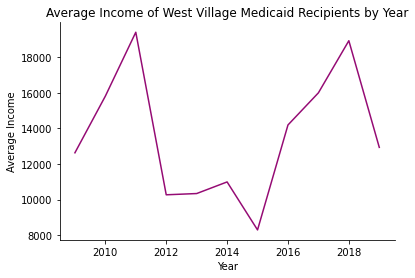

In [35]:
west_village = neighborhood[neighborhood['PUMA'] == 3807] #West Village is one of the richest areas of Manhattan/NYC

w = sns.lineplot(x="YEAR", y="AVGINC",
                     data=west_village, color="#950B74")
sns.despine()
w.set(xlabel='Year', ylabel='Average Income', title='Average Income of West Village Medicaid Recipients by Year')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Income'),
 Text(0.5, 1.0, 'Average Income of Longwood Medicaid Recipients by Year'),
 (0.0, 27500.0)]

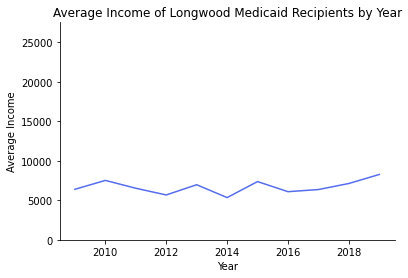

In [36]:
longwood = neighborhood[neighborhood['PUMA'] == 3710] #Longwood is one of the poorest areas of the Bronx and NYC

l = sns.lineplot(x="YEAR", y="AVGINC",
                     data=longwood, color="#556CED")
sns.despine()
l.set(xlabel='Year', ylabel='Average Income', title='Average Income of Longwood Medicaid Recipients by Year', ylim=(0,27500))

# Data Visualizations by County/Borough

In [106]:
brooklyn = df[df['COUNTYICP'] == 470]
brooklyn.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0,93
4,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,9999999,93
9,2009,200901,816473,862,119.0,2009008164731,13,470,4003,400336,...,0,0,0,1,1,2,0,0,9999999,501


In [108]:
brooklyn_weighted = brooklyn.groupby('YEAR', as_index=False).sum('PERWT')

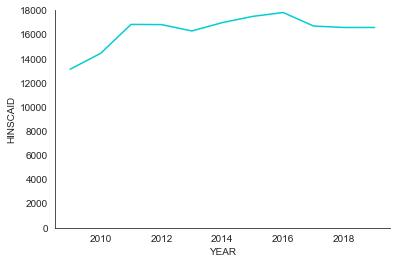

In [179]:
g = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=brooklyn_weighted, color="#00CED1")
g.set(ylim=(0, 18000))
sns.despine()

In [112]:
bronx = df[df['COUNTYICP'] == 50]

In [113]:
bronx_weighted = bronx.groupby('YEAR', as_index=False).sum('PERWT')

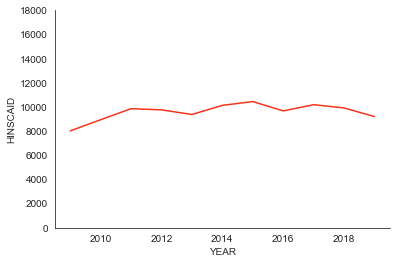

In [180]:
b = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=bronx_weighted, color="#F5331C")
b.set(ylim=(0, 18000))
sns.despine()

In [115]:
manhattan = df[df['COUNTYICP'] == 610]

In [118]:
manhattan_weighted = manhattan.groupby('YEAR', as_index=False).sum('PERWT')

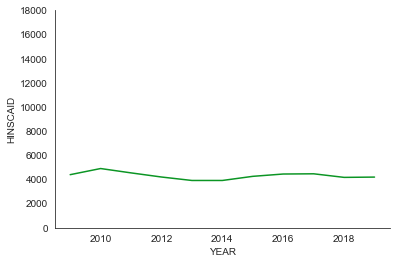

In [181]:
m = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=manhattan_weighted, color="#0B9524")
m.set(ylim=(0, 18000))
sns.despine()

In [126]:
staten_island = df[df['COUNTYICP'] == 850]

In [127]:
statenisland_weighted = staten_island.groupby('YEAR', as_index=False).sum('PERWT')

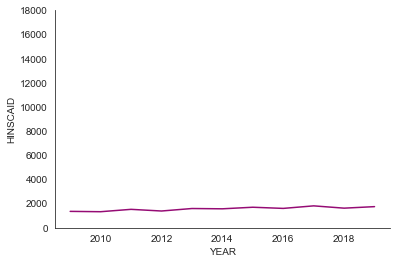

In [182]:
s = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=statenisland_weighted, color="#950B74")
s.set(ylim=(0,18000))
sns.despine()

In [11]:
queens = df[df['COUNTYICP'] == 810]

In [12]:
queens_weighted = queens.groupby('YEAR', as_index=False).sum('PERWT')

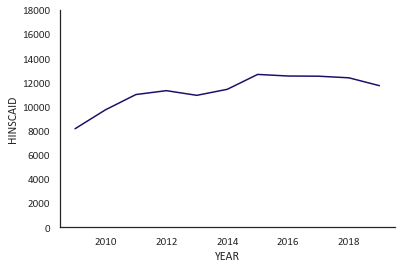

In [13]:
q = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=queens_weighted, color="#1F0D68")
q.set(ylim=(0,18000))
sns.despine()

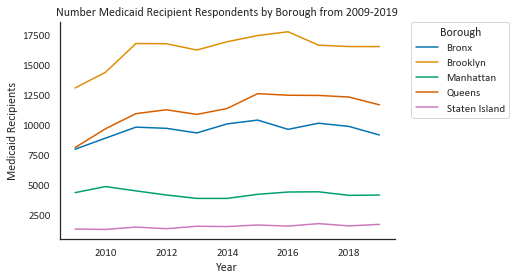

In [153]:
# this line below only needs to be run once to set the style for all plots
sns.set_theme(style='white', palette=sns.color_palette("colorblind", n_colors=5), font_scale=1, font='calibri')
df_weighted = df_weighted.replace([50, 470, 610, 810, 850], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
sns.lineplot(x='YEAR', y='HINSCAID', hue='COUNTYICP', 
             data=df_weighted,  palette=sns.color_palette("colorblind", n_colors=5))
#ny.set(ylim=(0, 20000))
sns.despine()
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.title('Number Medicaid Recipient Respondents by Borough from 2009-2019')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Borough")
plt.savefig('Medicaid Population 2009-2019 by Borough Weighted.png', bbox_inches='tight')

# Data Visualization by Attributes

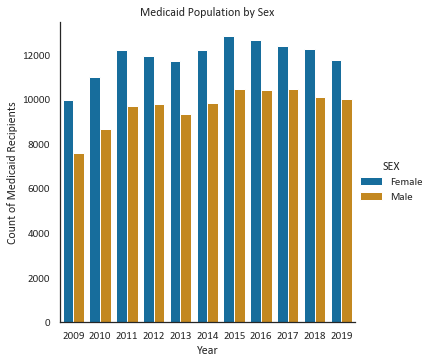

In [31]:
df["SEX"].replace({1: "Male", 2: "Female"}, inplace=True) #recoding the Sex variable from numbers to description
j = sns.catplot(x="YEAR", col="HINSCAID", hue='SEX',
                     data=df, kind='count', palette=sns.color_palette("colorblind"))
j.set(xlabel='Year', ylabel='Count of Medicaid Recipients', title='Medicaid Population by Sex')

This plot is unweighted. I am having difficulty plotting with the weighted dataset using variables besides Medicaid status

# Regression Analysis

Linear Regression of having Medicaid on Income

In [63]:
model = sm.OLS(df1['INCTOT'].dropna(), df1['HINSCAID'].dropna()).fit()
predictions = model.predict(df1['HINSCAID']) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 INCTOT   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                nan
Time:                        23:19:34   Log-Likelihood:            -2.0182e+06
No. Observations:              173724   AIC:                         4.036e+06
Df Residuals:                  173723   BIC:                         4.036e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HINSCAID    6540.0816     32.219    202.991      0.0

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


The regression coefficent suggests having Medicaid increases total income by ~$6540.08. There is no data on respondents without Medicaid so this is just preliminary information.

# Unweighted Data Visualizations

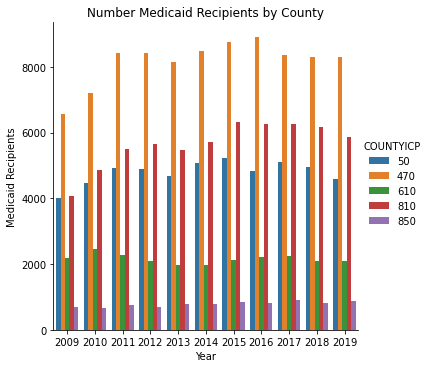

In [79]:
h = sns.catplot(x="YEAR", hue="COUNTYICP", col="HINSCAID",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.title('Number Medicaid Recipients by County')
plt.savefig('Medicaid Population 2009-2019 by NYC County.png', bbox_inches='tight')

Text(0.5, 6.79999999999999, 'Year')

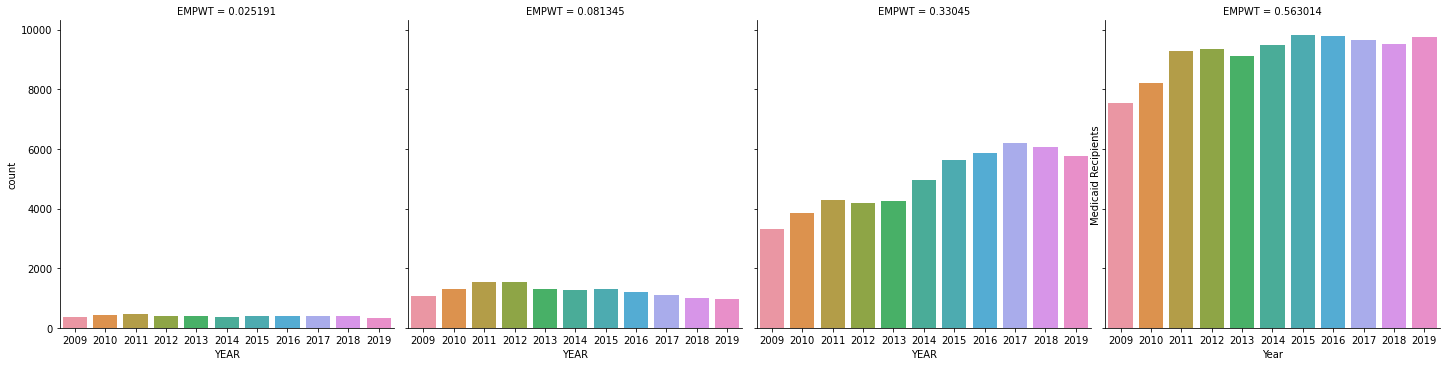

In [10]:
df2["EMPWT"].replace({1: "Male", 2: "Female"}, inplace=True)
i = sns.catplot(x="YEAR", col="EMPWT",
                     data=df2, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')

Text(0.5, 6.79999999999999, 'Year')

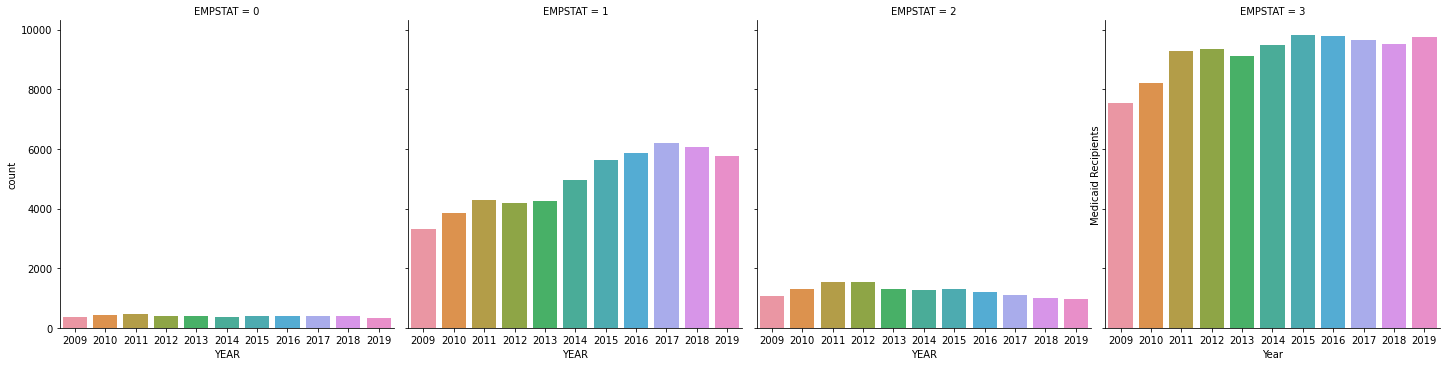

In [11]:
iu = sns.catplot(x="YEAR", col="EMPSTAT",
                     data=df2, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')

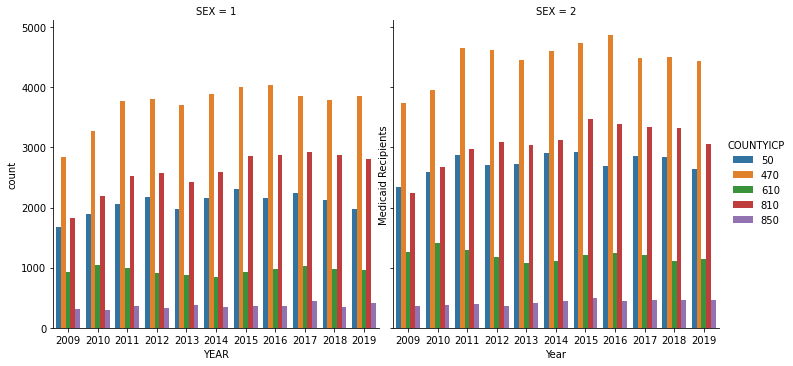

In [7]:
j = sns.catplot(x="YEAR", hue="COUNTYICP", col="SEX",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.savefig('Medicaid Population 2009-2019 by NYC County and Sex.png', bbox_inches='tight')

Text(0.5, 6.79999999999999, 'Year')

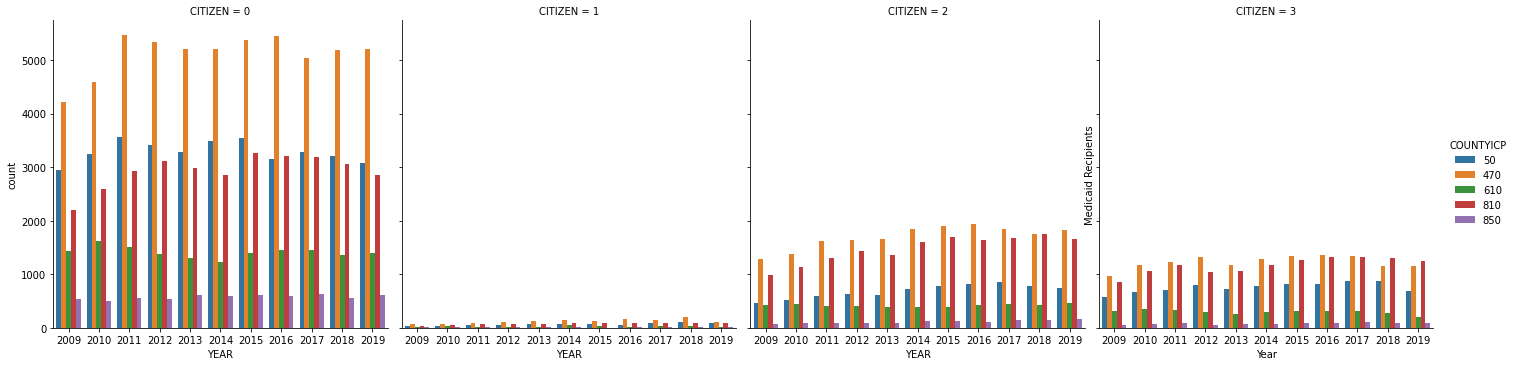

In [8]:
k = sns.catplot(x="YEAR", hue="COUNTYICP", col="CITIZEN",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')

Text(0.5, 6.79999999999999, 'Year')

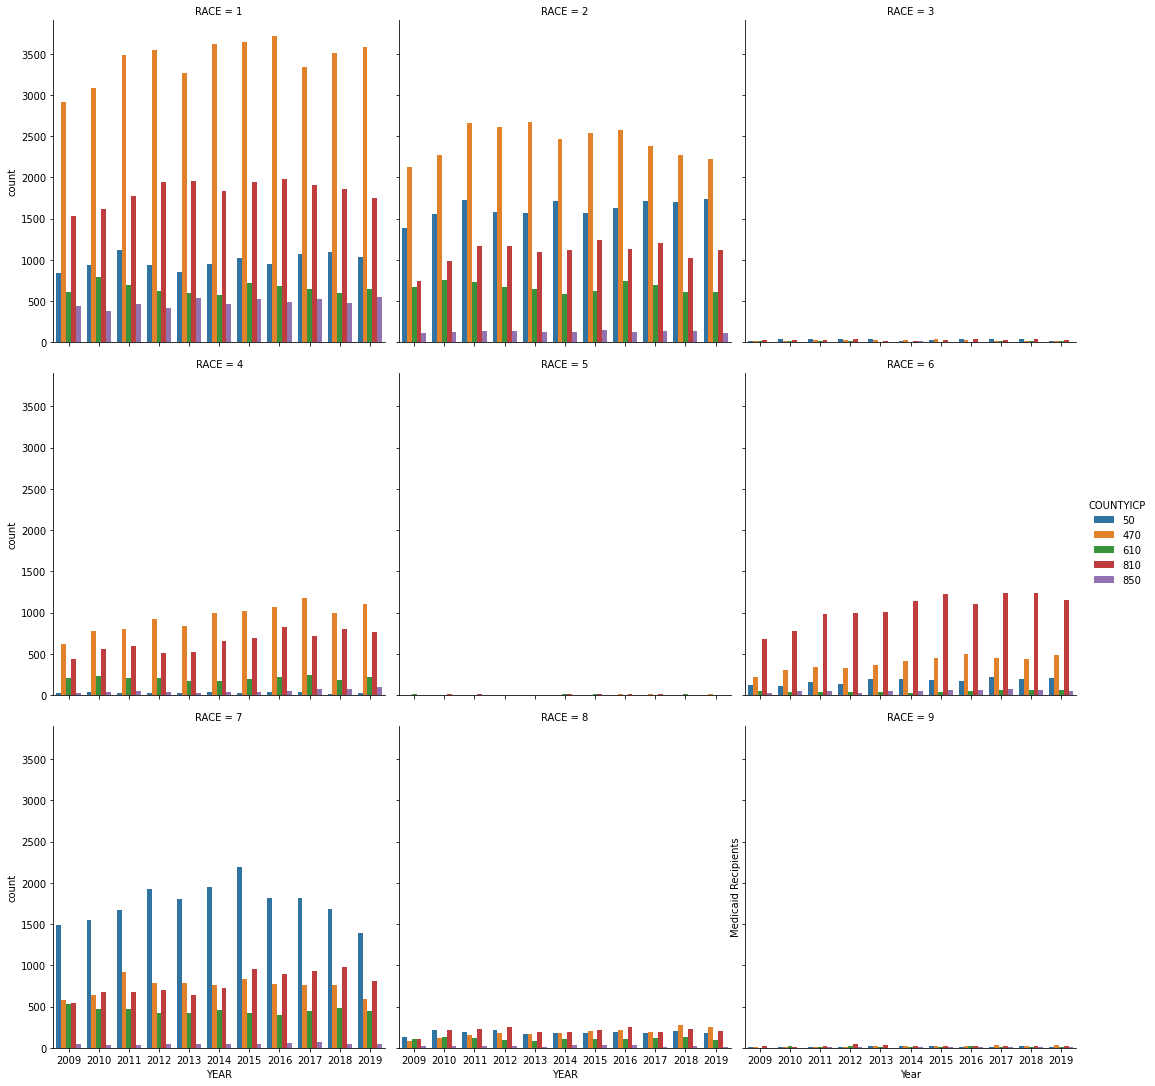

In [10]:
l = sns.catplot(x="YEAR", hue="COUNTYICP", col="RACE",
                     data=df, kind="count", col_wrap= 3)
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')